# **Installing Libraries**

In [ ]:
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **Accessing Twitter API**

In [ ]:
# Twitter API Credentials
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

In [ ]:
# Create the authentication object
authenticate = tw.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the Auth information
api = tw.API(authenticate, wait_on_rate_limit=True)

# **Get Tweets**

In [ ]:
topic = "#uscapitol"
query = tw.Cursor(api.search, q = topic).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp': tweet.created_at} for tweet in query]
print(tweets)

In [ ]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,It’s harder to get into #sandiegocomiccon than...,2021-01-07 21:34:26
1,RT @distressline: #Veterans might be affected ...,2021-01-07 21:34:24
2,So you can storm the capitol building and just...,2021-01-07 21:34:23
3,RT @UNHumanRights: We are deeply troubled by #...,2021-01-07 21:34:17
4,"""There was tremendous confusion coming out of ...",2021-01-07 21:34:13


In [ ]:
df.shape

(1000, 2)

# **Preprocessing**

In [ ]:
# Import Stopwords
import nltk
from nltk.corpus import stopwords

# Import Textblob
from textblob import Word, TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#uscapitol', '#USCapitol', '#UScapitol', '#usCapitol']

stop_words.extend(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweets'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Processed Tweets
0,It’s harder to get into #sandiegocomiccon than...,2021-01-07 21:34:26,It’s harder get #sandiegocomiccon US Capitol u...
1,RT @distressline: #Veterans might be affected ...,2021-01-07 21:34:24,@distressline: #Veterans might affected differ...
2,So you can storm the capitol building and just...,2021-01-07 21:34:23,So storm capitol building walk again?!? Such i...
3,RT @UNHumanRights: We are deeply troubled by #...,2021-01-07 21:34:17,@UNHumanRights: We deeply troubled attack ⏩ de...
4,"""There was tremendous confusion coming out of ...",2021-01-07 21:34:13,"""There tremendous confusion coming Capitol"" pe..."


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @ mentions
  text = re.sub(r'#', '', text) # Removing the # symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT (for retweets) from the text
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing urls

  return text

df['Very Processed Tweets'] = df['Processed Tweets'].apply(cleanTxt)
df

,Tweets,Timestamp,Processed Tweets,Very Processed Tweets
0,It’s harder to get into #sandiegocomiccon than...,2021-01-07 21:34:26,It’s harder get #sandiegocomiccon US Capitol u...,It’s harder get sandiegocomiccon US Capitol un...
1,RT @distressline: #Veterans might be affected ...,2021-01-07 21:34:24,@distressline: #Veterans might affected differ...,: Veterans might affected differently civil un...
2,So you can storm the capitol building and just...,2021-01-07 21:34:23,So storm capitol building walk again?!? Such i...,So storm capitol building walk again?!? Such i...
3,RT @UNHumanRights: We are deeply troubled by #...,2021-01-07 21:34:17,@UNHumanRights: We deeply troubled attack ⏩ de...,: We deeply troubled attack ⏩ demonstrating de...
4,"""There was tremendous confusion coming out of ...",2021-01-07 21:34:13,"""There tremendous confusion coming Capitol"" pe...","""There tremendous confusion coming Capitol"" pe..."
...,...,...,...,...
995,RT @EpochTimes: “We are accepting tips and dig...,2021-01-07 20:50:54,@EpochTimes: “We accepting tip digital medium ...,: “We accepting tip digital medium depicting r...
996,RT @INNERST71268676: yesterdays' song=Evenmore...,2021-01-07 20:50:53,@INNERST71268676: yesterdays' song=Evenmore-IN...,: yesterdays' song=Evenmore-INNERSTRENGTH🎶on S...
997,RT @WTAQMorningNews: Violence at the U.S. Capi...,2021-01-07 20:50:53,@WTAQMorningNews: Violence U.S. Capitol breach...,: Violence U.S. Capitol breached ... 8th Distr...
998,RT @IAmSophiaNelson: MY OPINION: White mobs an...,2021-01-07 20:50:52,@IAmSophiaNelson: MY OPINION: White mob Capito...,: MY OPINION: White mob Capitol riot American ...


# **Calculate Sentiment**

In [ ]:
df['polarity'] = df['Very Processed Tweets'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Very Processed Tweets'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
df.head()

,Tweets,Timestamp,Processed Tweets,Very Processed Tweets,polarity,subjectivity
0,It’s harder to get into #sandiegocomiccon than...,2021-01-07 21:34:26,It’s harder get #sandiegocomiccon US Capitol u...,It’s harder get sandiegocomiccon US Capitol un...,-0.050000,0.0
1,RT @distressline: #Veterans might be affected ...,2021-01-07 21:34:24,@distressline: #Veterans might affected differ...,: Veterans might affected differently civil un...,0.000000,0.6
2,So you can storm the capitol building and just...,2021-01-07 21:34:23,So storm capitol building walk again?!? Such i...,So storm capitol building walk again?!? Such i...,0.000000,0.5
3,RT @UNHumanRights: We are deeply troubled by #...,2021-01-07 21:34:17,@UNHumanRights: We deeply troubled attack ⏩ de...,: We deeply troubled attack ⏩ demonstrating de...,-0.550000,0.8
4,"""There was tremendous confusion coming out of ...",2021-01-07 21:34:13,"""There tremendous confusion coming Capitol"" pe...","""There tremendous confusion coming Capitol"" pe...",0.116667,0.8


# **Produce Wordcloud**

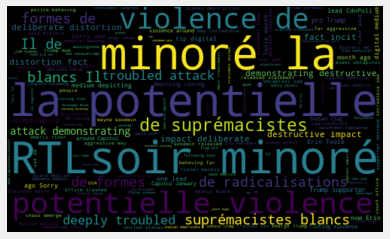

In [ ]:
# Plot The Word Cloud
allwords = ' '.join( [twts for twts in df['Very Processed Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allwords)

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

# **Exploring Polarity and Subjectivity**

In [ ]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive' 

df['Analysis'] = df['polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Timestamp,Processed Tweets,Very Processed Tweets,polarity,subjectivity,Analysis
0,It’s harder to get into #sandiegocomiccon than...,2021-01-07 21:34:26,It’s harder get #sandiegocomiccon US Capitol u...,It’s harder get sandiegocomiccon US Capitol un...,-0.050000,0.0,Negative
1,RT @distressline: #Veterans might be affected ...,2021-01-07 21:34:24,@distressline: #Veterans might affected differ...,: Veterans might affected differently civil un...,0.000000,0.6,Neutral
2,So you can storm the capitol building and just...,2021-01-07 21:34:23,So storm capitol building walk again?!? Such i...,So storm capitol building walk again?!? Such i...,0.000000,0.5,Neutral
3,RT @UNHumanRights: We are deeply troubled by #...,2021-01-07 21:34:17,@UNHumanRights: We deeply troubled attack ⏩ de...,: We deeply troubled attack ⏩ demonstrating de...,-0.550000,0.8,Negative
4,"""There was tremendous confusion coming out of ...",2021-01-07 21:34:13,"""There tremendous confusion coming Capitol"" pe...","""There tremendous confusion coming Capitol"" pe...",0.116667,0.8,Positive
...,...,...,...,...,...,...,...
995,RT @EpochTimes: “We are accepting tips and dig...,2021-01-07 20:50:54,@EpochTimes: “We accepting tip digital medium ...,: “We accepting tip digital medium depicting r...,0.000000,0.0,Neutral
996,RT @INNERST71268676: yesterdays' song=Evenmore...,2021-01-07 20:50:53,@INNERST71268676: yesterdays' song=Evenmore-IN...,: yesterdays' song=Evenmore-INNERSTRENGTH🎶on S...,0.000000,0.0,Neutral
997,RT @WTAQMorningNews: Violence at the U.S. Capi...,2021-01-07 20:50:53,@WTAQMorningNews: Violence U.S. Capitol breach...,: Violence U.S. Capitol breached ... 8th Distr...,0.000000,0.0,Neutral
998,RT @IAmSophiaNelson: MY OPINION: White mobs an...,2021-01-07 20:50:52,@IAmSophiaNelson: MY OPINION: White mob Capito...,: MY OPINION: White mob Capitol riot American ...,0.000000,0.0,Neutral


In [ ]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
     print(str(j) + ') ' + sortedDF['Very Processed Tweets'][i])
     print()
     j = j+1

In [ ]:
# Print all of the negative tweets
j = 1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
     print(str(j) + ') ' + sortedDF['Very Processed Tweets'][i])
     print()
     j = j+1

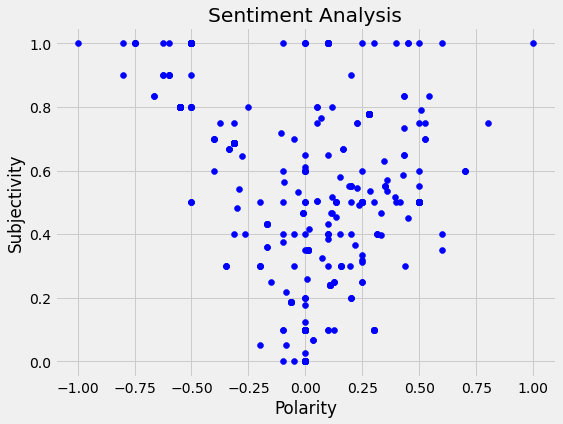

In [ ]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(x=df['polarity'][i], y = df['subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [ ]:
capitol_handle = ['US Capitol', 'U.S. Capitol', 'U.S Capitol', 'us capitol', 'USCapitol', 'UScapitol', 'uscapitol', 'Capitol', 'capitol']

In [ ]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Capitol'] = df['Very Processed Tweets'].apply(lambda x: identify_subject(x, capitol_handle)) 
df.head(10)

In [ ]:
df[['Very Processed Tweets', 'Capitol', 'polarity', 'subjectivity']].head()

,Very Processed Tweets,Capitol,polarity,subjectivity
0,It’s harder get sandiegocomiccon US Capitol un...,1,-0.050000,0.0
1,: Veterans might affected differently civil un...,0,0.000000,0.6
2,So storm capitol building walk again?!? Such i...,1,0.000000,0.5
3,: We deeply troubled attack ⏩ demonstrating de...,0,-0.550000,0.8
4,"""There tremendous confusion coming Capitol"" pe...",1,0.116667,0.8


In [ ]:
display(df[df['Capitol']==1][['Capitol','polarity','subjectivity']].groupby('Capitol').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
Capitol                                                         
1       -0.006226  0.5 -1.0    0.0     0.225667  1.0  0.0    0.0

In [ ]:
capitol = df[df['Capitol']==1][['Timestamp', 'polarity']]
capitol = capitol.sort_values(by='Timestamp', ascending=True)
capitol['MA Polarity'] = capitol.polarity.rolling(10, min_periods=3).mean()

In [ ]:
capitol.head()

(array([737797.86805556, 737797.87152778, 737797.875     , 737797.87847222,
        737797.88194444, 737797.88541667, 737797.88888889, 737797.89236111,
        737797.89583333, 737797.89930556]),
 <a list of 10 Text major ticklabel objects>)

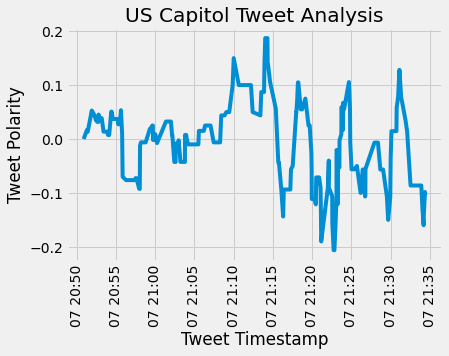

In [ ]:
plt.plot(capitol['Timestamp'], capitol['MA Polarity'])
plt.xlabel('Tweet Timestamp')
plt.ylabel('Tweet Polarity')
plt.title('US Capitol Tweet Analysis')
plt.xticks(rotation = 'vertical')